In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

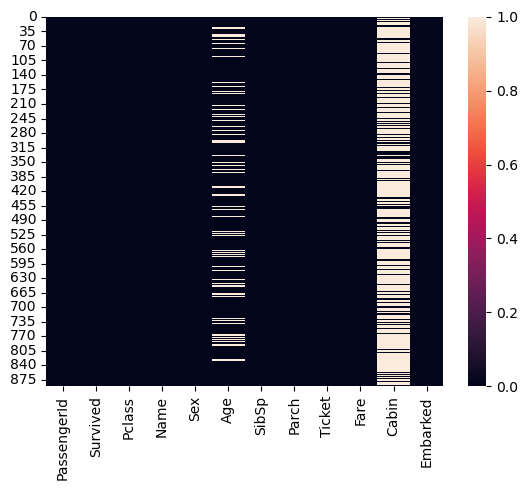

In [8]:
sns.heatmap(train.isnull())
plt.show()

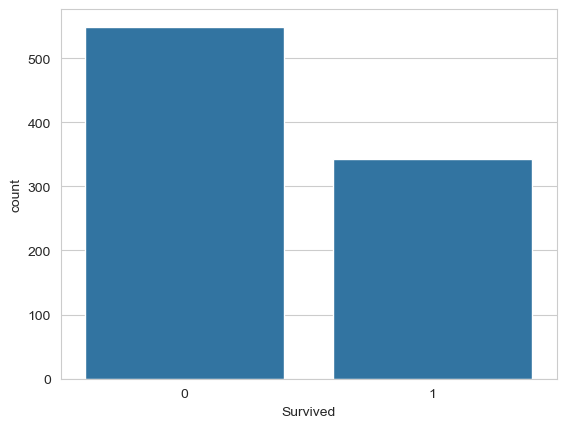

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

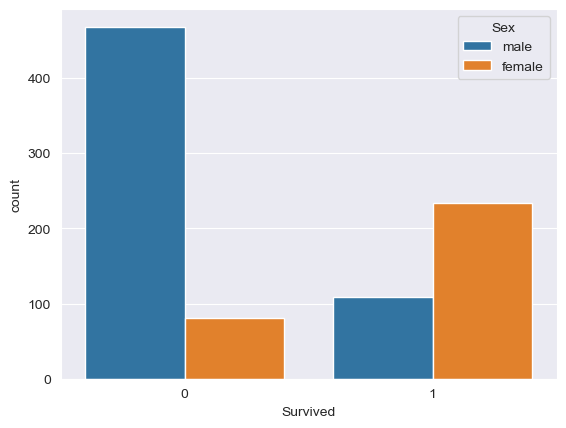

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

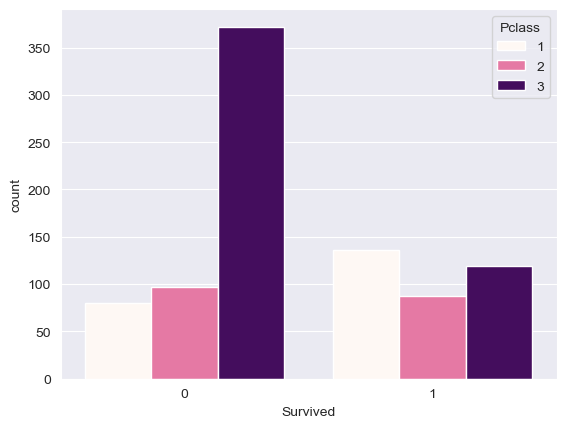

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdPu')
plt.show()

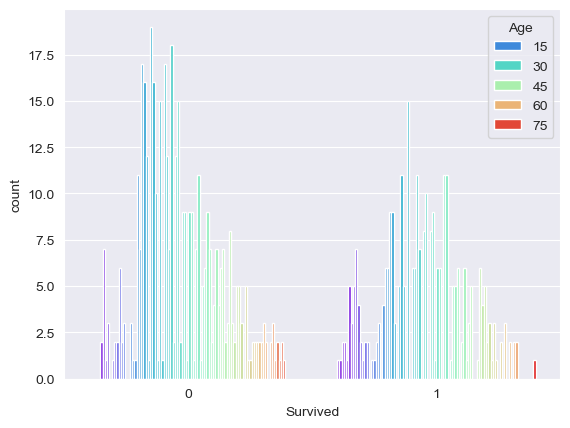

In [12]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Age',data=train,palette='rainbow')
plt.show()

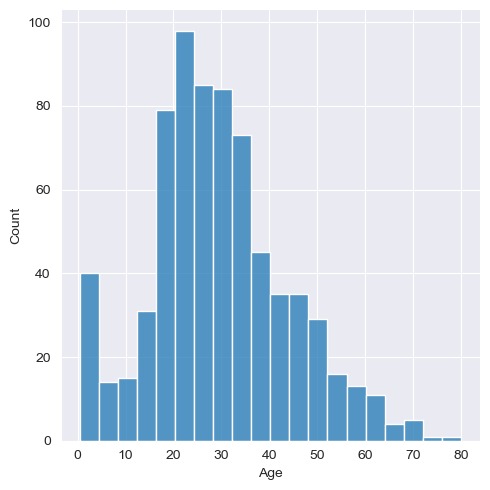

In [13]:
sns.displot(x=train['Age'].dropna(),kde=False)
plt.show()

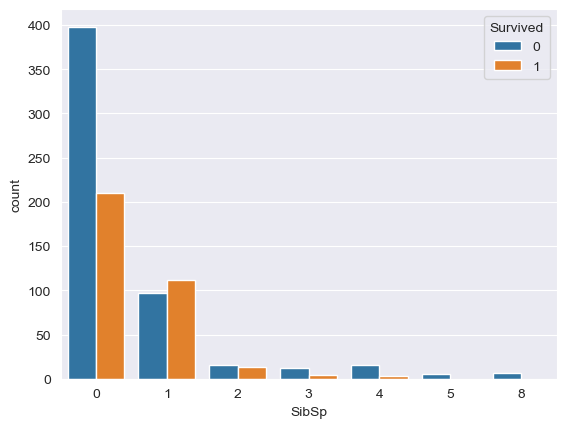

In [14]:
sns.countplot(x='SibSp',hue='Survived',data=train)
plt.show()

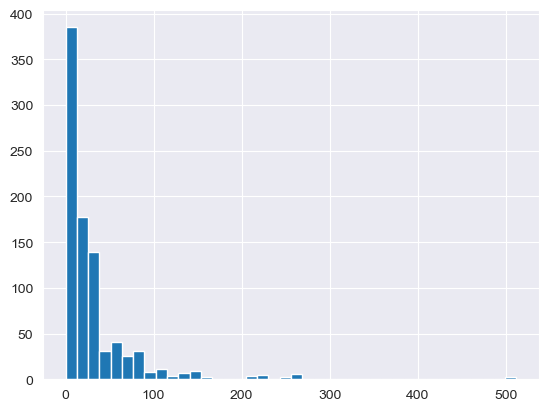

In [15]:
train['Fare'].hist(bins=40)
plt.show()

# Now Data Cleaning

till now what i did was visualizing and understanding the data now it is time to clean the data by removing null values and other processes

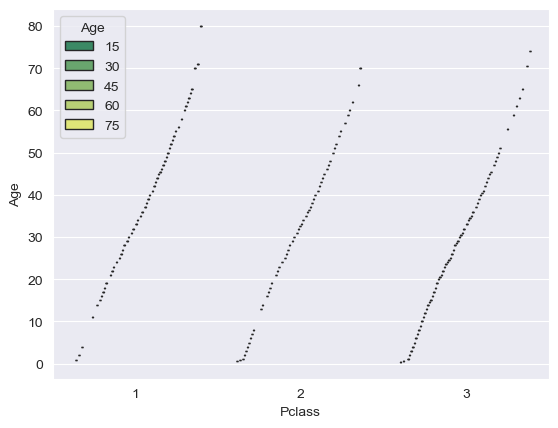

In [16]:
sns.boxplot(x='Pclass',y='Age',hue='Age',data=train,palette='summer')
plt.show()

In [17]:
# from the above box plot we can see that the average age of each class i.e class 1 = 37 (approx) , class 2 = 28 (approx) , class 3 = 24 (approx)
# now we have to write a function so that we can fill the null values using above data

def age_ass(col):
    Age=col[0]
    Pclass=col[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else :
            return 24
    else:
        return Age

In [18]:
train['Age']=train[['Age','Pclass']].apply(age_ass,axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_13160\3379063332.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=col[0]
C:\Users\acer\AppData\Local\Temp\ipykernel_13160\3379063332.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=col[1]


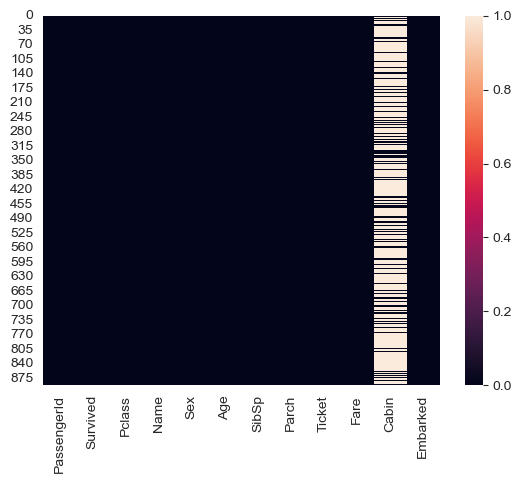

In [19]:
sns.heatmap(train.isnull())
plt.show()

# Age null values have been removed

In [20]:
#now we have to remove the cabin and also embarked null values
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
train.drop('Cabin',axis=1,inplace=True) # as the most of the values are null we will be dropping the whole cabin column so that we can proceed with the cleaning in this process

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train[['Fare','Embarked']]

,Fare,Embarked
0,7.2500,S
1,71.2833,C
2,7.9250,S
3,53.1000,S
4,8.0500,S
...,...,...
886,13.0000,S
887,30.0000,S
888,23.4500,S
889,30.0000,C


C:\Users\acer\AppData\Local\Temp\ipykernel_13160\2820269398.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Fare',x='Embarked',data=train,palette='summer')


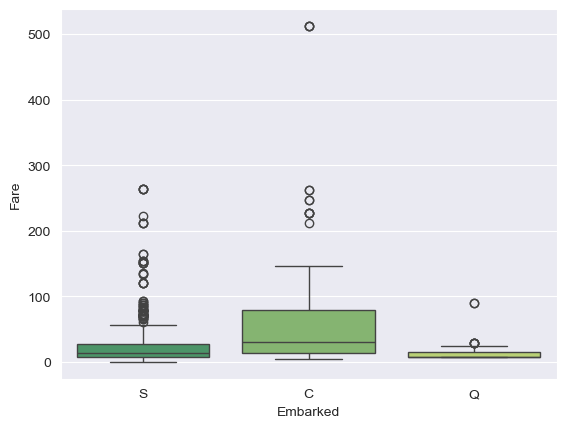

In [24]:
sns.boxplot(y='Fare',x='Embarked',data=train,palette='summer')
plt.show()

In [25]:
def Emb_ass(col):
    Embarked=col[0]
    Fare=col[1]

    if pd.isnull(Embarked):

        if Fare <= 7:
            return 'Q'
        elif Fare <= 70 and Fare >= 7:
            return 'S'
        else :
            return 'C'
    else:
        return Embarked

In [26]:
train['Embarked']=train[['Embarked','Fare']].apply(Emb_ass,axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_13160\1767289090.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Embarked=col[0]
C:\Users\acer\AppData\Local\Temp\ipykernel_13160\1767289090.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Fare=col[1]


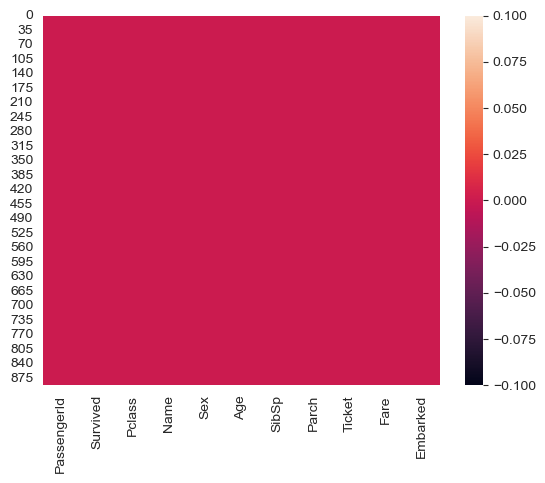

In [27]:
sns.heatmap(train.isnull())
plt.show()

In [28]:
pd.get_dummies(train['Embarked'],drop_first = True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
sex=pd.get_dummies(train['Sex'],drop_first = True).astype(int)
embarked=pd.get_dummies(train['Embarked'],drop_first = True).astype(int)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
train=pd.concat([train,sex,embarked],axis=1) # need to make sure i add axis = 1 so that it shows it is in columns

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now data is ready to be sent to our model 

# Model Buiilding 

In [34]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.2,random_state=101)

## Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [40]:
prections=logmodel.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy=confusion_matrix(y_test,prections)

In [43]:
accuracy

array([[85, 14],
       [22, 58]])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,prections)
accuracy

0.7988826815642458

In [46]:
prections

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0])